----
**Carga de librerías**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [8]:
#Cargamos los datos
! pip install openpyxl
data = pd.read_excel('data/bosch_aic_datathon.xlsx')

In [9]:
# Exploramos los tipos de datos
type(data)

pandas.core.frame.DataFrame

In [10]:
#hacemos una copia de los datos
data_sucia=data

In [11]:
#Previsualizamos los datos
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


In [12]:
data_sucia.shape

(1403, 20)

In [13]:
data_sucia.info()
#Podemos ver que la mayoría de los datos son objetos 
#hay unos que son enteros, por lo que unos si será necesario cambiarlos 
#La columna de alta y baja son fechas de tiempo ese si corresponde

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Posición                                      1403 non-null   object        
 1   Area                                          1403 non-null   object        
 2   Á.liq.                                        1403 non-null   object        
 3   Grupo de personal                             1403 non-null   object        
 4   CODIGO POSTAL                                 1403 non-null   int64         
 5   Motivo de la RENUNCIA                         1403 non-null   object        
 6   Banda                                         1402 non-null   object        
 7   Baja                                          1403 non-null   datetime64[ns]
 8   ReglaPHT                                      1403 non-null   object

In [14]:
data_sucia.describe()

,CODIGO POSTAL,Baja,Alta,Años,Meses,Antigüedad,Edad del empleado,Hijos
count,1403.000000,1403,1403,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,32550.890948,2022-11-23 09:07:03.378474752,2018-11-18 22:17:21.767640576,4.192445,48.848373,1465.451176,30.941554,1.132573
min,3259.000000,2022-01-01 00:00:00,1993-09-06 00:00:00,0.000000,0.166667,5.000000,18.000000,0.000000
25%,32575.000000,2022-06-14 00:00:00,2016-12-28 00:00:00,1.000000,5.766667,173.000000,24.000000,0.000000
50%,32575.000000,2022-11-23 00:00:00,2019-10-31 00:00:00,3.000000,32.600000,978.000000,28.000000,1.000000
75%,32599.000000,2023-05-07 00:00:00,2022-09-14 00:00:00,6.000000,71.100000,2133.000000,36.000000,2.000000
max,75116.000000,2023-10-31 00:00:00,2023-10-05 00:00:00,29.000000,351.733333,10552.000000,67.000000,6.000000
std,1740.667827,NaN,NaN,4.650099,54.076010,1622.280304,9.734537,1.302182


In [15]:
data_sucia.columns

Index(['Posición', 'Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
       'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta', 'Años',
       'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
       'Nacionalidad', 'Edad del empleado',
       '¿Cuanto tiempo tiene viviendo en Cd. Juarez?', 'Estado Civil',
       'Hijos'],
      dtype='object')

In [16]:
columns = [
    'Posición', 'Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
    'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta',
    'Años', 'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
    'Nacionalidad', 'Edad del empleado', '¿Cuanto tiempo tiene viviendo en Cd. Juarez?',
    'Estado Civil', 'Hijos'
]

for column in columns:
    print(column, data_sucia[column].isna().sum())

# Dejando de lado la columna de vivir en juarez, tenemos un total de 13 NA's
# Podemos eliminar las filas de la columna de BANDA y la de LUGAR DE NACIMIENTO
# La columna de ESTADO CIVIL la podemos cambiar a soltero
# En cambio, la columna de juarez podemos cambiar todos esos NA's por "no he vivido en CD.JUAREZ"

Posición 0
Area 0
Á.liq. 0
Grupo de personal 0
CODIGO POSTAL 0
Motivo de la RENUNCIA 0
Banda 1
Baja 0
ReglaPHT 0
Alta 0
Años 0
Meses 0
Antigüedad 0
Clave de sexo 0
Lugar de nacimiento 2
Nacionalidad 0
Edad del empleado 0
¿Cuanto tiempo tiene viviendo en Cd. Juarez? 786
Estado Civil 10
Hijos 0


# One-hot para Clave de sexo

In [17]:
#Usamos One-hot para cambiar la columna del sexo
data_limpia = pd.get_dummies(data_sucia,columns=['Clave de sexo'],dtype=int)

# Agrupación para la columna de cuanto tiempo viviendo en Cd. Juarez

In [18]:
#Esta tecnica tambien se puede usar para la columna de cuantos años has vivido en juarez, pero primero
#hay que cambiar los NA's por 0, porque si es NA's es porque no ha vivido en Juarez
#Primero cambiamos los NA's por 0
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].fillna('Never', inplace=True)
data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].unique()

#Para poder limpiar lo de los años voy a agruparlos en una cantidad fija, ya que hay valores como 2 y esa clase de valores
#puede ir contenidos en 1-3, esto se ve en la celda anterior
def categorize_years(value):
    if value in ['91-180 Days', '61-90 Days']:
        return '1 - Years'
    elif value in ['1-2 Years', '2-3 Years','1-2 Years ']:
        return '1 - 3 Years'
    elif value in ['3-4 Years', '4-5 Years',4,5]:
        return '3 - 5 Years'
    elif value in ['5-6 Years', '6-7 Years', '6 Years',7]:
        return '5 - 7 Years'
    elif value in ['7-8 Years', '8-9 Years', '9-10 Years', '10 years', '10+ Years',10]:
        return '7 - 10 Years'
    elif value in ['26 years','25 years',21,19,16,25]:
        return '10 + Years'
    else: 
        return value

data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'] = data_sucia['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'].apply(categorize_years)



In [19]:
#Considero que esto es lo mejor ya que la entrada de datos puede ser mejor para el modelo
#data_limpia = pd.get_dummies(data_sucia,columns=['¿Cuanto tiempo tiene viviendo en Cd. Juarez?'],dtype=int)
#data.head()

# Quitams los '-' y '/' de Motivo de la RENUNCIA

In [20]:
data_limpia['Motivo de la RENUNCIA'] = data_sucia['Motivo de la RENUNCIA'].replace(to_replace='[-/]', value=' ', regex=True)

# Limpieza de Columna de Estado Civil

In [21]:
#Ahora tenemos que cambiar el los NA's de estado civil por soltero, esto no se si sea lo correcto, pero
#a lo mejor le da pena decir que es soltero no se 
data_limpia['Estado Civil'].fillna('solter', inplace=True)
data_limpia['Estado Civil'].unique()


def categorize_civil(value):
    if value in ['solter','Solter','viud.']:
        return 'Solter'
    elif value in ['casad.','Casad.','Concu.','U.Libr']:
        return 'Casad'
    elif value in ['Divorc','Sep.','divorc']:
        return 'Separ'
    else:
        return value

data_limpia['Estado Civil'] = data_limpia['Estado Civil'].apply(categorize_civil)

# Limpieza de la columna de Lugar de Nacimiento

In [22]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['AZTECA CIUDAD JUAREZ','CAMARGO','CD JUAREZ','CD JUAREZ CHIH','CD. JUAREZ'],'Chihuahua')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['CD. GOMEZ PALACIO','GENERAL SIMON BOLIVAR','GOMEZ PALACIO', 'LERDO','DURANGO','PEÑON BLANCO','POBLADO EL LUCERO','SAN DIMAS','TLAHUALILO DE ZARAGOZA'],'Durango')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['AGUASCALIENTES'],'Aguascalientes')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['AHOME','CULIACAN'],'Sinaloa')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['ANGEL R CABADA','COATZACOALCOS','CORDOBA','CORDOVA','COSAMALOAPAN','LAS MERCEDES','MARTINEZ DE LA TORRE','MINATITLAN','MOLOACAN','RAYA CARACOL','SAN ANDRES TUXTLA','TRES VALLES','VERACRUZ'],'Veracruz')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['ACOAHUILA],'COAHUILA DE ZARAGOZA','EJISO NUEVO BENAVIDES','MATAMOROS COAH.','TORREON','VIESCA','SCoahuila')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['A],'S)

SyntaxError: unterminated string literal (detected at line 7) (1452427747.py, line 7)

In [ ]:
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['GUADALUPE ANALCO','PUEBLA'],'PUEBLA')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['IXHUATAN','OAXACA','PASO DEL JOBO','SAN FRANCISCO DEL MAR','SAN JUAN BAUTISTA TUXTEPE','SAN LUCAS OJITLAN','TUXTEPEC'],'OAXACA')
data_limpia['Lugar de nacimiento'] = data_sucia['Lugar de nacimiento'].replace(['MATAMOROS'],'TAMAUlIPAS')


# Ahora que ya tenemos la limpieza lista podemos eliminar todos los valores donde hay NA

In [ ]:
data_limpia = data_limpia.dropna()

# Comparaciones del tamaño de los dataset

In [ ]:
print('Original',data.shape)
print('Sucio',data_sucia.shape)
#El limpio tiene mas columnas debido al one-coding
print('Limpio',data_limpia.shape)

Original (1403, 20)
Sucio (1403, 20)
Limpio (1400, 35)


In [ ]:
# Ver las columnas
data_limpia.head()

In [ ]:
# Este comando cambiar el tipo de columnas, no se exactamente cuales y a que tipo por lo que dejo así el borrador
#data_limpia["nombre_columna"] = data_sucia["nombre_columna"].astype(int)

## Gráfica cantidad de Hijos

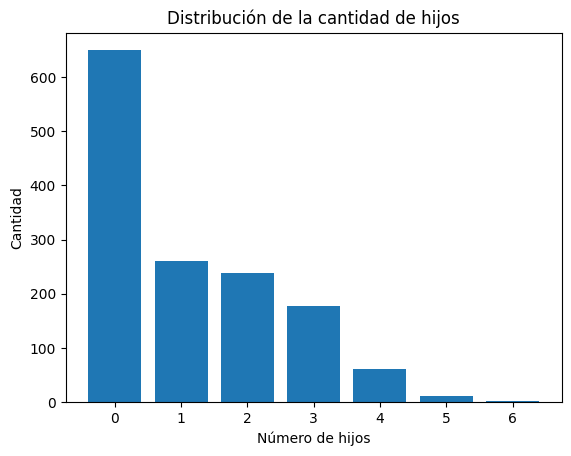

In [ ]:
#Graficas de la cantidad de hijos
num_hijos = data_limpia['Hijos'].value_counts()
num_hijos = num_hijos.sort_index()
plt.bar(num_hijos.index,num_hijos.values)
plt.xlabel("Número de hijos")
plt.ylabel("Cantidad")
plt.title("Distribución de la cantidad de hijos")
plt.xticks(num_hijos.index)
plt.show()

## Gráfica Estado Civil

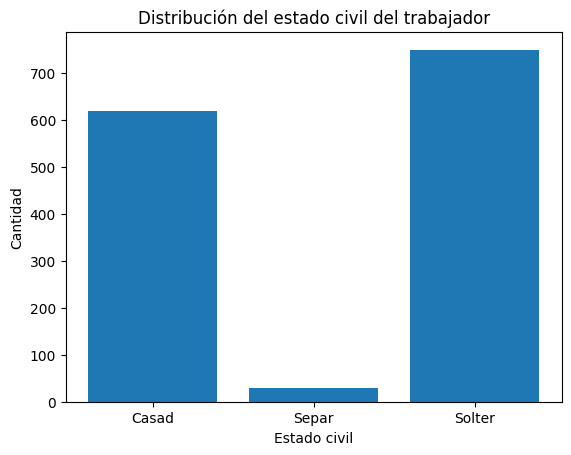

In [ ]:
#Graficas del estado civil del trabajador
num_est_civil = data_limpia['Estado Civil'].value_counts()
num_est_civil = num_est_civil.sort_index()
plt.bar(num_est_civil.index,num_est_civil.values)
plt.xlabel("Estado civil")
plt.ylabel("Cantidad")
plt.title("Distribución del estado civil del trabajador")
plt.show()

# Gráfica Motivo de RENUNCIA

In [ ]:
data_limpia['Motivo de la RENUNCIA'].value_counts()

Motivo de la RENUNCIA
Vol Otro empleo                     308
Vol Transferencia entre planta      237
Vol No regreso   no dio razón       218
Vol Prob personales y o fam.        197
Vol Insatisfacción personal          94
Vol Cambio de domicilio              89
Imp.Tra Ausentismos continuos        71
Vol Estudios                         68
Imp.Tra Jubilación                   33
Vol Razones médicas                  28
Imp.Tra LFT y o Reglamento int       12
Imp.Tra LFT y o Reglamento Int.      12
Imp.Pat Pensionado IMSS               8
Imp.Pat Terminación del Contrato      6
Imp.Tra Bajo desempeño                3
Muerte Natural                        3
Vol Maternidad                        3
Imp.Pat Terminación del contra        2
Imp.Tra Falsificación de docto        2
Muerte Accidental                     2
Imp.Tra Falsificación de doctos.      2
Vol Matrimonio                        1
Imp.Tra Uso de drogas y o bebi        1
Vol Problemas con transporte          1
Vol Ambiente de tr

# Renuncia (Guillermo)

In [ ]:
data_sucia["Motivo de la RENUNCIA"].unique()

array(['Vol-Otro empleo', 'Vol-Estudios', 'Vol-Cambio de domicilio',
       'Vol-Prob personales y/o fam.', 'Vol-No regreso / no dio razón',
       'Vol-Insatisfacción personal', 'Vol-Transferencia entre planta',
       'Imp.Tra-LFT y/o Reglamento int', 'Imp.Tra-Ausentismos continuos',
       'Imp.Pat-Pensionado IMSS', 'Vol-Razones médicas',
       'Imp.Tra-Jubilación', 'Vol-Ambiente de trabajo', 'Vol-Maternidad',
       'Muerte Accidental', 'Imp.Pat-Terminación del contra',
       'Imp.Tra-Bajo desempeño', 'Vol-Matrimonio', 'Muerte Natural',
       'Imp.Tra-Falsificación de docto', 'Imp.Tra-Uso de drogas y/o bebi',
       'Vol-Problemas con transporte', 'Imp.Tra-LFT y/o Reglamento Int.',
       'Imp.Pat-Terminación del Contrato', 'Imp.Pat-Varios Jubilado',
       'Imp.Tra-Falsificación de doctos.'], dtype=object)

Target = VOL = RENUNCIA
- Otro empleo
- Estudios
- NO regreso
- ...
- ...

In [ ]:
data_sucia["Motivo de la RENUNCIA"].value_counts()

Motivo de la RENUNCIA
Vol-Otro empleo                     308
Vol-Transferencia entre planta      237
Vol-No regreso / no dio razón       218
Vol-Prob personales y/o fam.        197
Vol-Insatisfacción personal          94
Vol-Cambio de domicilio              89
Imp.Tra-Ausentismos continuos        71
Vol-Estudios                         68
Imp.Tra-Jubilación                   33
Vol-Razones médicas                  28
Imp.Tra-LFT y/o Reglamento int       12
Imp.Tra-LFT y/o Reglamento Int.      12
Imp.Pat-Pensionado IMSS               8
Imp.Pat-Terminación del Contrato      6
Imp.Tra-Bajo desempeño                3
Muerte Natural                        3
Vol-Maternidad                        3
Imp.Pat-Terminación del contra        2
Imp.Tra-Falsificación de docto        2
Muerte Accidental                     2
Imp.Tra-Falsificación de doctos.      2
Vol-Matrimonio                        1
Imp.Tra-Uso de drogas y/o bebi        1
Vol-Problemas con transporte          1
Vol-Ambiente de tr

In [ ]:
data_sucia["CODIGO POSTAL"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1403 entries, 0 to 1402
Series name: CODIGO POSTAL
Non-Null Count  Dtype
--------------  -----
1403 non-null   int64
dtypes: int64(1)
memory usage: 11.1 KB


In [ ]:
data_sucia["CODIGO POSTAL"].unique()

array([32520, 32217, 32600, 32575, 32674, 32690, 32576, 32540, 32584,
       32599, 32433, 32696, 32570, 32598, 32150, 32665, 32695, 32410,
       32587, 32697, 32594, 32543, 32583, 32160, 32545, 32100, 32546,
       32563, 32667, 32580, 32240, 32618, 32590, 32573, 32424, 32675,
       32380, 32350, 32500, 32200, 32472, 32668, 32660, 32585, 32553,
        3720, 32664, 32107, 32574, 32654, 32699, 32551, 32510, 32422,
       32659, 32389, 32340, 32698, 32471, 32130, 27000, 32548, 32560,
       32400, 32550, 32469, 32215, 32720, 32310, 32586, 32190, 32552,
       32539, 50180, 32676, 32250, 32617, 32448, 32425, 32610, 32170,
       32110, 32680, 32220, 32230, 32606, 32536, 45086, 32912, 32742,
       32616, 32722, 32210, 32360, 32687, 32140, 32379, 32330, 32702,
       32538, 32670, 32740, 32264, 32577, 75116, 32662, 32320, 32650,
       32300, 32605, 23575, 32450, 32652, 32050, 32647, 32280, 32403,
        3259, 32180, 32750, 32408, 32060, 32423, 32159, 32677],
      dtype=int64)

## Comentario: 

Para el punto 4 del desafío, proponogo plotear una gráfica (podrían ser dos) que relacione el código póstal (podría ser ubicación actual) con el motivo de RENUNCIA Vol-

----
** Area de Victor para creacion de base de datos **

In [ ]:
# Importar libreria para trabajar con mysql
import mysql.connector



# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon',
    'Raise_on_warnings': True
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()





ModuleNotFoundError: No module named 'mysql'